## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from textblob import TextBlob

In [2]:
print(matplotlib.__version__)

3.7.2


## Data Loading and Exploration | Cleaning

In [ ]:
#Load a CSV file then creating a dataframe
amazon = pd.read_csv(r"C:\Users\sonay\Downloads\amazon.csv")
amazon

In [4]:
#have a look on the columns and their data types using detailed info function
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [44]:
#column names
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'comment',
       'comment_copy'],
      dtype='object')

##  Missing Values

In [5]:
#Finding the missing values in each columns
amazon.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
#Finding columns, where missing values
amazon[amazon.isnull().sum(axis=1)>0]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [7]:
#clear columns from null values
amazon.dropna(inplace=True)

In [8]:
#Cheking missing values
amazon.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
# Finding unusual string in rating column
amazon['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
3.2      2
2.8      2
3.0      2
5.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

##  Changing Data Types of Columns from object to float

In [10]:

amazon = amazon[amazon['rating']!="|"]
amazon['rating'] = amazon['rating'].astype('float64')
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   object 
 4   actual_price         1462 non-null   object 
 5   discount_percentage  1462 non-null   object 
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   object 
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

C:\Users\sonay\AppData\Local\Temp\ipykernel_22444\959781986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating'] = amazon['rating'].astype('float64')


In [11]:
amazon['rating'].dtype

dtype('float64')

In [12]:
#Creating a function that replaces "," with an empty line
def f(x):
    if isinstance(x, str):
        x =  x.replace(',', '')
    return x
 


amazon['rating_count'] = amazon['rating_count'].apply(f)
amazon['rating_count'] = amazon['rating_count'].astype('float64')

amazon.head(3)

C:\Users\sonay\AppData\Local\Temp\ipykernel_22444\153722380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating_count'] = amazon['rating_count'].apply(f)
C:\Users\sonay\AppData\Local\Temp\ipykernel_22444\153722380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating_count'] = amazon['rating_count'].astype('float64')


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [13]:
amazon['rating_count'].dtype

dtype('float64')

In [14]:
#Creating and implementing functions for shortening names from 'category' column
def short_name(name):
    name = name.split('|')
    return name[0] + '|' + name[-1]
amazon['category'] = amazon['category'].apply(short_name)


#Creating and accepting functions for converting value for columns 'discounted_price', 'actual_price'
def f1(x):
    if isinstance(x, str):
        x =  x.replace('₹', '').replace(',', '')
    return x
amazon[['discounted_price', 'actual_price']] = amazon[['discounted_price', 'actual_price']].applymap(f1)
amazon = amazon.astype({'discounted_price':'float64', 'actual_price': 'float64'})

#Converting the value of the 'discount_percentage' column
amazon['discount_percentage'] = amazon['discount_percentage'].apply(lambda x: float(x.replace('%', '')))

amazon.head(3)

C:\Users\sonay\AppData\Local\Temp\ipykernel_22444\3706718397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['category'] = amazon['category'].apply(short_name)
C:\Users\sonay\AppData\Local\Temp\ipykernel_22444\3706718397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon[['discounted_price', 'actual_price']] = amazon[['discounted_price', 'actual_price']].applymap(f1)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|USBCables,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|USBCables,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|USBCables,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [15]:
#Checking data types
amazon['discount_percentage'].dtype

dtype('float64')

In [16]:
#Creating a function using a TextBlob object that checks the tone of the reviews
def analiz_text(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neytral'
    
amazon['comment'] = amazon['review_title'].apply(analiz_text)
amazon['comment_copy'] = amazon['comment']
amazon.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,comment,comment_copy
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|USBCables,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Positive,Positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|USBCables,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Positive,Positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|USBCables,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Positive,Positive


## Duplicates

In [47]:
amazon.duplicated().any()

False

## Grouping and Aggregation

In [75]:
a = amazon[['category', 'product_name']].groupby('category', sort=False).count()
a[a['product_name']<5]

,product_name
category,
Electronics|RCACables,2
Electronics|Mounts,1
Electronics|OpticalCables,3
Electronics|Projectors,3
Electronics|Adapters,3
...,...
Home&Kitchen|RotiMakers,1
Home&Kitchen|FanParts&Accessories,1
Home&Kitchen|StandMixers,1


In [76]:
df_group_rating = amazon[['category', 'rating']].groupby('category').mean().sort_values(by='rating', ascending=False)

df_group_rating.head()

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|PowerLANAdapters,4.5
Electronics|StreamingClients,4.5
Computers&Accessories|Memory,4.5
Home&Kitchen|SmallApplianceParts&Accessories,4.5


In [77]:
discount_rating = amazon[['category', 'discount_percentage']].groupby(['category']).mean().merge(merge_table, on='category', how='inner').sort_values(by='rating', ascending=False)
discount_rating.head()

,discount_percentage,Positive,Negative,Neytral,rating
category,,,,,
Electronics|ScreenProtectors,66.857143,7,0,0,4.471429
Electronics|DisposableBatteries,14.285714,4,1,2,4.414286
Computers&Accessories|ExternalHardDisks,27.000000,4,2,0,4.400000
Computers&Accessories|GamingMice,33.500000,5,1,0,4.383333
Computers&Accessories|MousePads,61.250000,8,0,0,4.375000


## Creating a pivot table 

In [86]:
#Creating a pivot table that summarizes the number of positive, negative, and neutral reviews by category
df_comment_percent = amazon.pivot_table(values='comment_copy', index='category', columns='comment', aggfunc='count', fill_value=0, sort=False)
df_comment_percent.sort_values(by='Positive', ascending=False, inplace=True)
df_comment_percent = df_comment_percent[df_comment_percent.sum(axis=1)>5]
df_comment_percent.head()


comment,Positive,Negative,Neytral
category,,,
Computers&Accessories|USBCables,192,15,24
Electronics|SmartWatches,63,7,6
Electronics|SmartTelevisions,56,4,3
Electronics|Smartphones,49,15,4
Electronics|In-Ear,46,3,3


In [87]:
#Convert the number of comments to a percentage
df_comment_percent['comment_sum'] = df_comment_percent.iloc[:, 0:3].sum(axis=1)
df_comment_percent ['positive_comm_percent'] =round(df_comment_percent['Positive']*100/df_comment_percent['comment_sum'])
df_comment_percent ['negative_comm_percent'] = round(df_comment_percent['Negative']*100/df_comment_percent['comment_sum'])
df_comment_percent['neytral_com_percent'] = round(df_comment_percent['Neytral']*100/df_comment_percent['comment_sum'])
df_comment_percent.head()


comment,Positive,Negative,Neytral,comment_sum,positive_comm_percent,negative_comm_percent,neytral_com_percent
category,,,,,,,
Computers&Accessories|USBCables,192,15,24,231,83.0,6.0,10.0
Electronics|SmartWatches,63,7,6,76,83.0,9.0,8.0
Electronics|SmartTelevisions,56,4,3,63,89.0,6.0,5.0
Electronics|Smartphones,49,15,4,68,72.0,22.0,6.0
Electronics|In-Ear,46,3,3,52,88.0,6.0,6.0


## Joining dataframes 

In [94]:
#Joining two dataframes, that to compare columns 'rating' and 'positive_comment'
merge_table = df_comment_percent.merge(df_group_rating, how='inner', on='category')
merge_table.sort_values(by='Positive',ascending=False, inplace=True)
merge_table.head()

,Positive,Negative,Neytral,comment_sum,positive_comm_percent,negative_comm_percent,neytral_com_percent,rating
category,,,,,,,,
Computers&Accessories|USBCables,192,15,24,231,83.0,6.0,10.0,4.153247
Electronics|SmartWatches,63,7,6,76,83.0,9.0,8.0,4.025000
Electronics|SmartTelevisions,56,4,3,63,89.0,6.0,5.0,4.209524
Electronics|Smartphones,49,15,4,68,72.0,22.0,6.0,4.100000
Electronics|In-Ear,46,3,3,52,88.0,6.0,6.0,3.898077


# Data Visualization

## Histogram

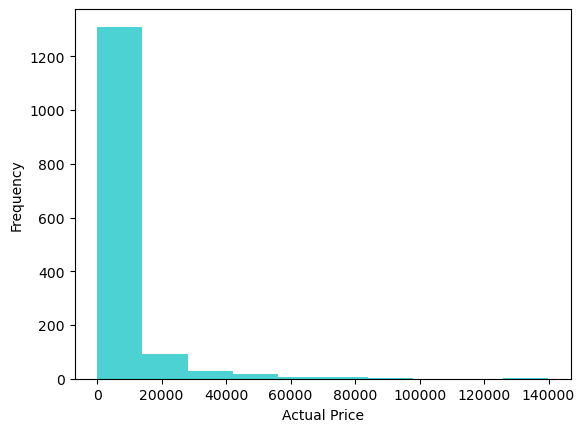

In [111]:
# Plot distribution of actual_price
plt.hist(amazon['actual_price'], color='c',alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

## Bar

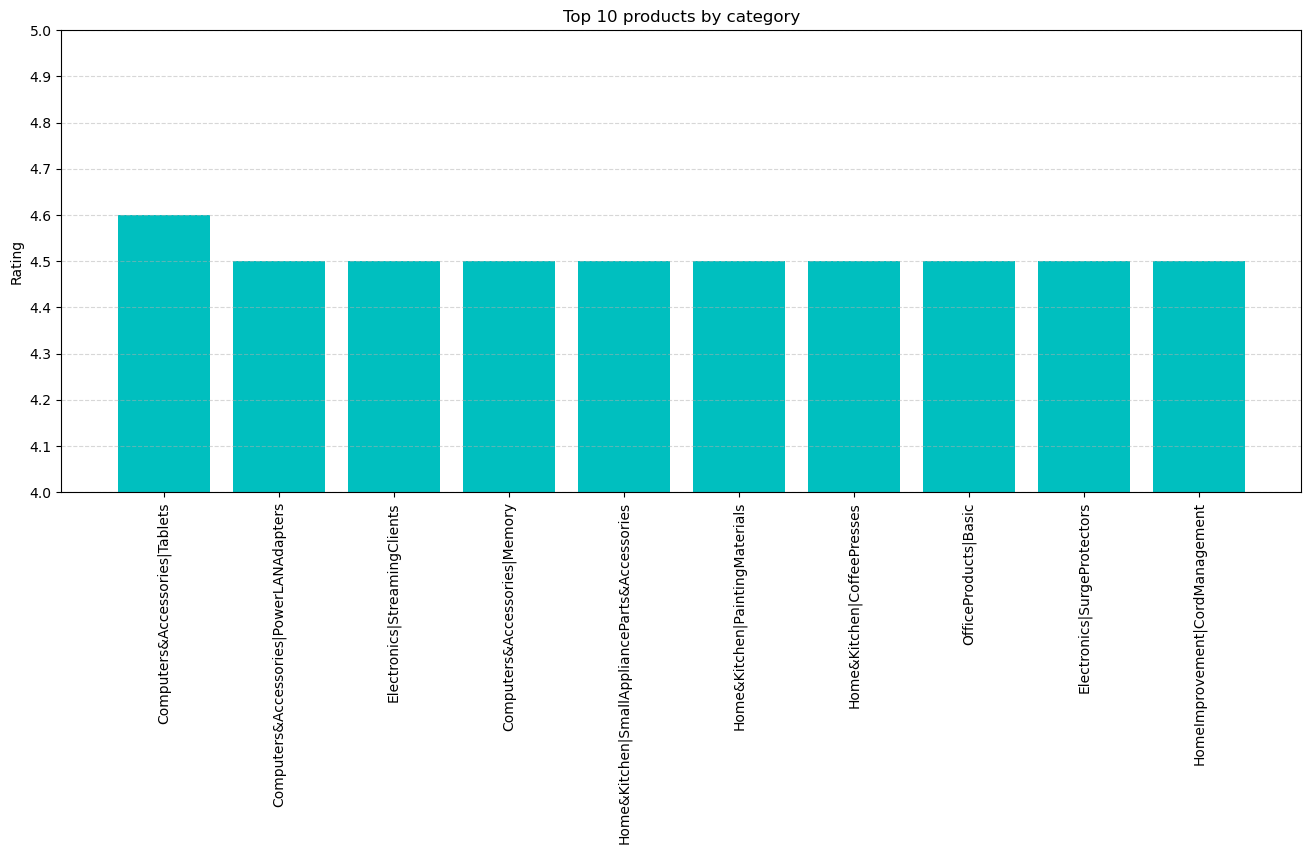

In [89]:
# Creating a bar chart that shows the top 10 popular products
plt.figure(figsize=(16, 6))
plt.title('Top 10 products by category')

plt.bar(df_group_rating.iloc[0:10].index.values, df_group_rating['rating'].iloc[0:10] , color='c')
plt.grid(linestyle='--', axis='y',alpha=0.5)
plt.ylim(4, 5)
plt.yticks([4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5])
plt.tick_params(axis='x', labelrotation=90)
plt.ylabel('Rating')
plt.show()

  ## Determining the factors influencing the rating

<Axes: ylabel='Rating'>

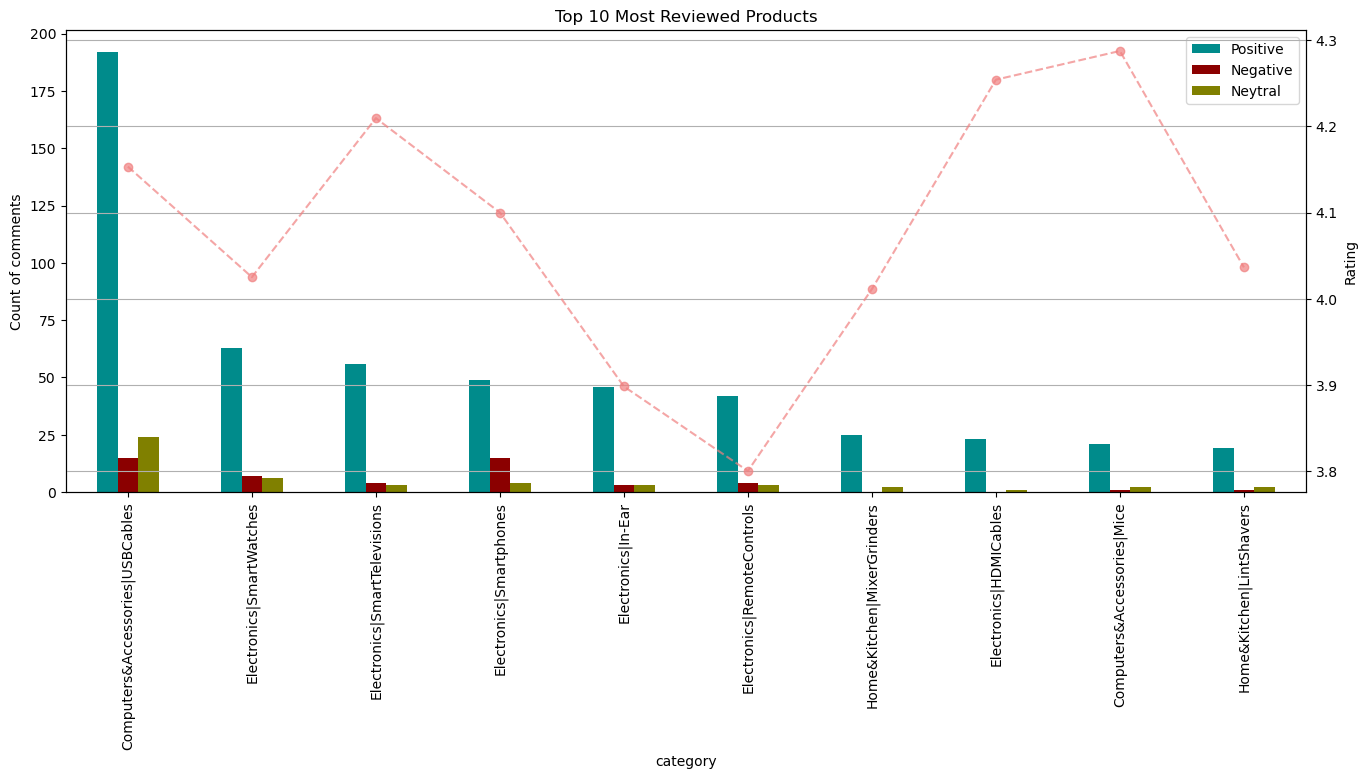

In [90]:
# Создание график поквзывающий сравнения 'rating' и 'positive_comment'
merge_table[['Positive', 'Negative', 'Neytral']].iloc[0:10].plot(kind='bar',figsize=(16, 6), title='Top 10 Most Reviewed Products' ,ylabel='Count of comments', color=['darkcyan', 'darkred', 'olive'])
merge_table['rating'].iloc[0:10].plot(secondary_y=True,figsize=(16, 6), style='o--', title='Top 10 Most Reviewed Products', grid='horizontal',ylabel='Rating', color='lightcoral', alpha=0.7, rot=90)


<Axes: title={'center': 'Top 10 Most Reviewed Products'}, xlabel='category', ylabel='Count of comments'>

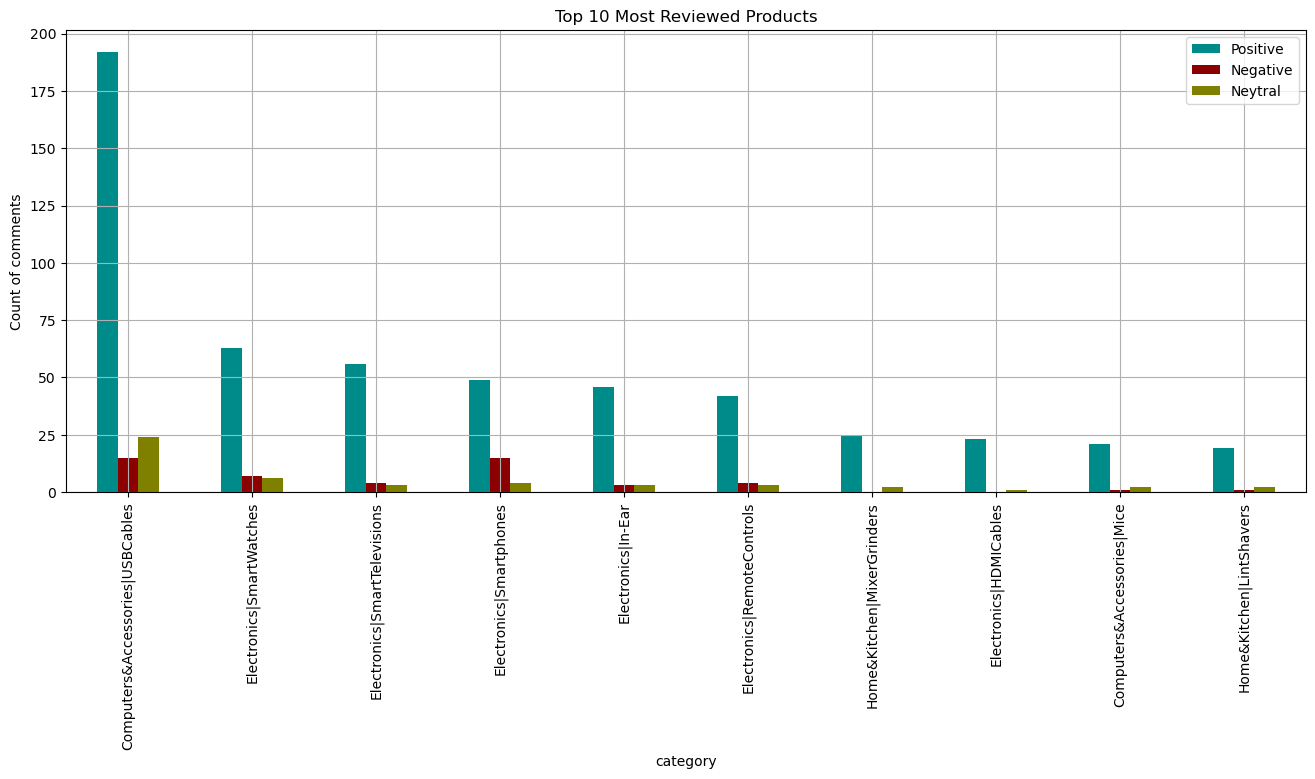

In [91]:
merge_table.iloc[0:10].plot(kind='bar',figsize=(16, 6), y=['Positive', 'Negative', 'Neytral'], title='Top 10 Most Reviewed Products', grid='horizontal',ylabel='Count of comments', color=['darkcyan', 'darkred', 'olive'])


In [95]:
#changing merge_table to dataframe with the new index
merge_table.reset_index(inplace=True)
merge_table.head()

,category,Positive,Negative,Neytral,comment_sum,positive_comm_percent,negative_comm_percent,neytral_com_percent,rating
0,Computers&Accessories|USBCables,192,15,24,231,83.0,6.0,10.0,4.153247
1,Electronics|SmartWatches,63,7,6,76,83.0,9.0,8.0,4.025000
2,Electronics|SmartTelevisions,56,4,3,63,89.0,6.0,5.0,4.209524
3,Electronics|Smartphones,49,15,4,68,72.0,22.0,6.0,4.100000
4,Electronics|In-Ear,46,3,3,52,88.0,6.0,6.0,3.898077


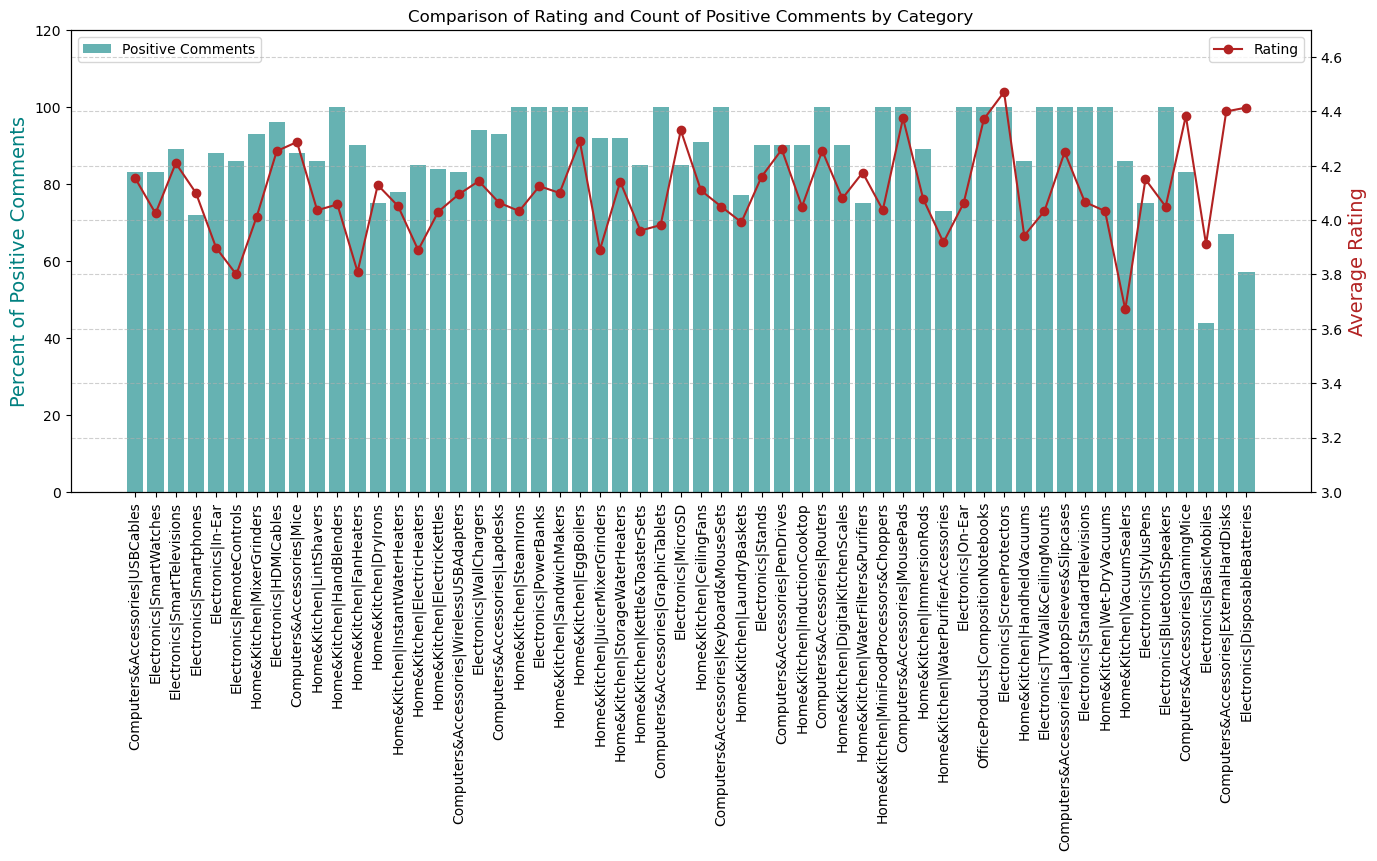

In [107]:
# Установка цвета
fig, ax1 = plt.subplots(figsize=(16, 6))
plt.title('Comparison of Rating and Count of Positive Comments by Category')
# Создание столбиковой диаграммы для positive comments

ax1.bar(merge_table['category'], merge_table['positive_comm_percent'], color='teal', alpha=0.6, label='Positive Comments')
ax1.set_ylabel('Percent of Positive Comments', color='teal', fontsize=14)
plt.ylim(0,120)
plt.xticks(rotation=90)
# Создание вторичной оси для отображения рейтинга
ax2 = ax1.twinx()
ax2.plot(merge_table['category'], merge_table['rating'], color='firebrick', marker='o', label='Rating')
ax2.set_ylabel('Average Rating', color='firebrick', fontsize=14)
plt.ylim(3, 4.7)
plt.grid(linestyle='--', alpha=0.6)


# Добавление легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()


In [ ]:
amazon['discount_percentage'].dtype

In [99]:
#Соединяем столбцы 'discount_percentage' и 'rating', чтобы сравнить их
discount_rating.reset_index(inplace=True)
discount_rating.head()

,category,discount_percentage,Positive,Negative,Neytral,rating
0,Electronics|ScreenProtectors,66.857143,7,0,0,4.471429
1,Electronics|DisposableBatteries,14.285714,4,1,2,4.414286
2,Computers&Accessories|ExternalHardDisks,27.000000,4,2,0,4.400000
3,Computers&Accessories|GamingMice,33.500000,5,1,0,4.383333
4,Computers&Accessories|MousePads,61.250000,8,0,0,4.375000


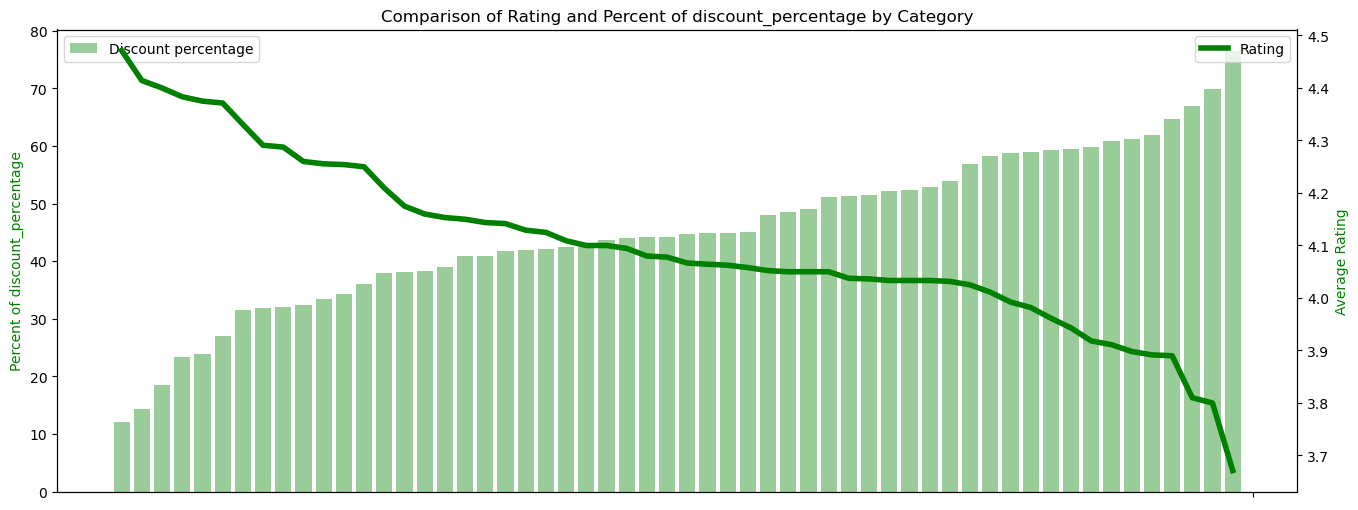

In [100]:
# Установка цвета
fig, ax1 = plt.subplots(figsize=(16, 6))
plt.title('Comparison of Rating and Percent of discount_percentage by Category')
# Создание столбиковой диаграммы для positive comments
ax1.bar(discount_rating['category'], discount_rating['discount_percentage'].sort_values(), color='g', alpha=0.4, label='Discount percentage')
ax1.set_ylabel('Percent of discount_percentage', color='g')
plt.xticks(rotation=90)

# Создание вторичной оси для отображения рейтинга
ax2 = ax1.twinx()
ax2.plot(discount_rating['category'], discount_rating['rating'], color='g',linewidth=4 , label='Rating')
ax2.set_ylabel('Average Rating', color='g')
ax2.set_xticks('')

# Добавление легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()